--- 
Project for the course in Microeconometrics | Summer 2020, M.Sc. Economics, Bonn University | [Federico Alexander Rizzuto](https://github.com/FedericoAlexanderRizzuto)

# Replication of Joshua D. Angrist, Erich Battistin, and Daniela Vuri  (2017) <a class="tocSkip">   
---

This notebook contains my replication of the results from the following paper:

> Angrist, J. D., Battistin, E., & Vuri, D. (2017). In a small moment: Class size and moral hazard in the Italian Mezzogiorno. American Economic Journal: Applied Economics, 9(4), 216-49.

The original paper, data and code can be accessed [here](https://www.aeaweb.org/articles?id=10.1257/app.20160267).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li><li><span><a href="#2.-Theoretical-Background" data-toc-modified-id="2.-Theoretical-Background-2">2. Theoretical Background</a></span></li><li><span><a href="#3.-Identification" data-toc-modified-id="3.-Identification-3">3. Identification</a></span></li><li><span><a href="#4.-Empirical-Strategy" data-toc-modified-id="4.-Empirical-Strategy-4">4. Empirical Strategy</a></span></li><li><span><a href="#5.-Replication-of-Lindo-et-al.-(2010)" data-toc-modified-id="5.-Replication-of-Lindo-et-al.-(2010)-5">5. Replication of Lindo et al. (2010)</a></span><ul class="toc-item"><li><span><a href="#5.1.-Data-&amp;-Descriptive-Statistics" data-toc-modified-id="5.1.-Data-&amp;-Descriptive-Statistics-5.1">5.1. Data &amp; Descriptive Statistics</a></span></li><li><span><a href="#5.2.-Results" data-toc-modified-id="5.2.-Results-5.2">5.2. Results</a></span><ul class="toc-item"><li><span><a href="#5.2.1.-Tests-of-the-Validity-of-the-RD-Approach" data-toc-modified-id="5.2.1.-Tests-of-the-Validity-of-the-RD-Approach-5.2.1">5.2.1. Tests of the Validity of the RD Approach</a></span></li><li><span><a href="#i.--Extension:-Visual-Validity-Check" data-toc-modified-id="i.--Extension:-Visual-Validity-Check-5.2.2">i.  Extension: Visual Validity Check</a></span></li><li><span><a href="#ii.-Advanced-Validity-Check" data-toc-modified-id="ii.-Advanced-Validity-Check-5.2.3">ii. Advanced Validity Check</a></span></li><li><span><a href="#5.2.2.-First-Year-GPAs-and-Academic-Probation" data-toc-modified-id="5.2.2.-First-Year-GPAs-and-Academic-Probation-5.2.4">5.2.2. First Year GPAs and Academic Probation</a></span></li><li><span><a href="#5.2.3.-The-Immediate-Response-to-Academic-Probation" data-toc-modified-id="5.2.3.-The-Immediate-Response-to-Academic-Probation-5.2.5">5.2.3. The Immediate Response to Academic Probation</a></span></li><li><span><a href="#5.2.4.-The-Impact-onSubsequent-Performance" data-toc-modified-id="5.2.4.-The-Impact-onSubsequent-Performance-5.2.6">5.2.4. The Impact onSubsequent Performance</a></span></li><li><span><a href="#i.-Main-Results-for-Impact-on-GPA-&amp;-Probability-of-Placing-Above-Cutoff-in-the-Next-Term" data-toc-modified-id="i.-Main-Results-for-Impact-on-GPA-&amp;-Probability-of-Placing-Above-Cutoff-in-the-Next-Term-5.2.7">i. Main Results for Impact on GPA &amp; Probability of Placing Above Cutoff in the Next Term</a></span></li><li><span><a href="#ii.-Formal-Bound-Analysis-on-Subsequent-GPA-(partial-extension)" data-toc-modified-id="ii.-Formal-Bound-Analysis-on-Subsequent-GPA-(partial-extension)-5.2.8">ii. Formal Bound Analysis on Subsequent GPA (partial extension)</a></span></li><li><span><a href="#5.2.5.-The-Impacts-on-Graduation" data-toc-modified-id="5.2.5.-The-Impacts-on-Graduation-5.2.9">5.2.5. The Impacts on Graduation</a></span></li></ul></li></ul></li><li><span><a href="#6.-Extension:-Robustness-Checks" data-toc-modified-id="6.-Extension:-Robustness-Checks-6">6. Extension: Robustness Checks</a></span><ul class="toc-item"><li><span><a href="#6.1.--A-Closer-Look-at-Students'-Subsequent-Performance." data-toc-modified-id="6.1.--A-Closer-Look-at-Students'-Subsequent-Performance.-6.1">6.1.  A Closer Look at Students' Subsequent Performance.</a></span><ul class="toc-item"><li><span><a href="#6.1.1.-Subsequent-Performance-and-Total-Credits-in-Year-2" data-toc-modified-id="6.1.1.-Subsequent-Performance-and-Total-Credits-in-Year-2-6.1.1">6.1.1. Subsequent Performance and Total Credits in Year 2</a></span></li><li><span><a href="#6.1.2.-Subsequent-Cumulative-Grade-Point-Average-(CGPA)" data-toc-modified-id="6.1.2.-Subsequent-Cumulative-Grade-Point-Average-(CGPA)-6.1.2">6.1.2. Subsequent Cumulative Grade Point Average (CGPA)</a></span></li></ul></li><li><span><a href="#6.2.-Bandwidth-Sensitivity" data-toc-modified-id="6.2.-Bandwidth-Sensitivity-6.2">6.2. Bandwidth Sensitivity</a></span></li></ul></li><li><span><a href="#7.-Conclusion" data-toc-modified-id="7.-Conclusion-7">7. Conclusion</a></span></li><li><span><a href="#8.-References" data-toc-modified-id="8.-References-8">8. References</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib.pyplot as plt

In [2]:
#from auxiliary.auxiliary_predictions import *
from auxiliary.auxiliary_plots import *
from auxiliary.auxiliary_tables import *

In [3]:
df = pd.read_stata(r"data\smallmo.dta")
df = prepare_data(df)

#### Table 1

_Panel A. Class characteristics: Means and standard deviations (in parentheses) are computed using one observation per class._

_*Conditional on non-missing survey responses_

In [4]:
create_table1a(df)

grade                                Grade 2                          Grade 5  \
north_center                           Italy North/Center     South     Italy   
Female*                      mean       0.49         0.49      0.49      0.49   
                             std        0.11         0.11      0.11      0.11   
Immigrant*                   mean       0.10         0.14      0.03      0.10   
                             std        0.12         0.13      0.06      0.12   
Father HS*                   mean       0.34         0.34      0.33      0.31   
                             std        0.14         0.13      0.16      0.15   
Mother employed*             mean       0.54         0.67      0.37      0.53   
                             std        0.23         0.16      0.20      0.23   
Pct correct: Math            mean      63.91        61.54     68.02     64.16   
                             std       13.15        10.29     16.20     12.91   
Pct correct: Language        mean      69.78        69.18     70.81     74.22   
                             std       10.92         9.18     13.34      8.90   
Class size                   mean      20.12        20.25     19.90     19.66   
                             std        3.40         3.35      3.48      3.72   
Score manipulation: Math     mean       0.06         0.02      0.14      0.07   
                             std        0.24         0.13      0.35      0.25   
Score manipulation: Language mean       0.05         0.02      0.11      0.06   
                             std        0.23         0.15      0.31      0.23   
Number of classes            count  67453.00     42747.00  24706.00  72536.00   

grade                                                      
north_center                       North/Center     South  
Female*                      mean          0.49      0.49  
                             std           0.11      0.11  
Immigrant*                   mean          0.14      0.03  
                             std           0.13      0.06  
Father HS*                   mean          0.32      0.30  
                             std           0.14      0.16  
Mother employed*             mean          0.65      0.36  
                             std           0.16      0.19  
Pct correct: Math            mean         63.26     65.61  
                             std          10.87     15.53  
Pct correct: Language        mean         74.27     74.12  
                             std           7.47     10.82  
Class size                   mean         19.90     19.28  
                             std           3.67      3.76  
Score manipulation: Math     mean          0.02      0.14  
                             std           0.15      0.34  
Score manipulation: Language mean          0.02      0.11  
                             std           0.15      0.31  
Number of classes            count     44739.00  27797.00

_Panel B. School characteristics: Means and standard deviations (in parentheses) are computed using one observation per school._

In [5]:
create_table1b(df)

grade                     Grade 2                          Grade 5  \
north_center                Italy North/Center     South     Italy   
Number of classes mean       1.95         1.87      2.11      1.94   
                  std        1.11         1.01      1.27      1.10   
Enrollment        mean      40.52        38.83     43.83     38.87   
                  std       25.16        22.99     28.64     25.19   
Number of schools count  34591.00     22863.00  11728.00  37476.00   

grade                                           
north_center            North/Center     South  
Number of classes mean          1.85      2.10  
                  std           0.98      1.28  
Enrollment        mean         37.32     41.69  
                  std          22.76     28.91  
Number of schools count     24225.00  13251.00

_Panel C. Institution characteristics: Means and standard deviations (in parentheses) are computed using one observation per institution._

In [6]:
create_table1c(df)

grade                     Grade 2                         Grade 5  \
north_center                Italy North/Center    South     Italy   
Number of classes mean       3.89         4.33     3.31      4.07   
                  std        1.97         1.95     1.85      1.95   
Enrollment        mean      86.00        95.33    73.68     85.17   
                  std       40.61        39.52    38.71     40.45   
External monitor  mean       0.22         0.23     0.20      0.21   
                  std        0.41         0.42     0.40      0.41   
Number of schools count  17333.00      9866.00  7467.00  17830.00   

grade                                          
north_center            North/Center    South  
Number of classes mean          4.48     3.55  
                  std           1.91     1.88  
Enrollment        mean         94.02    73.88  
                  std          39.11    39.31  
External monitor  mean          0.23     0.20  
                  std           0.42     0.40  
Number of schools count      9997.00  7833.00

#### Figure 2

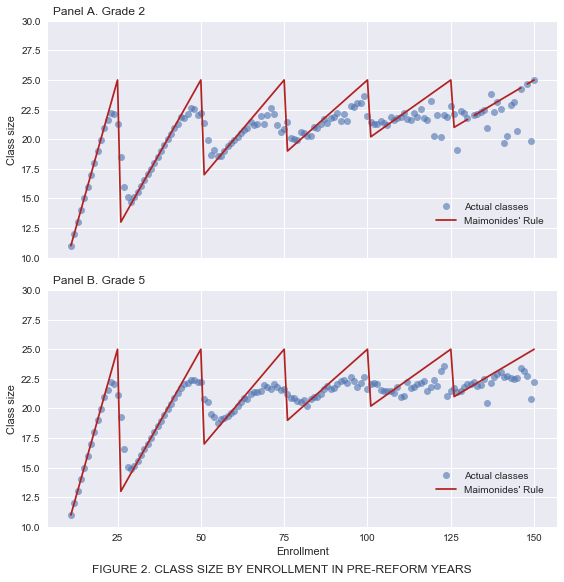

In [7]:
create_fig2(df)

#### Figure 3

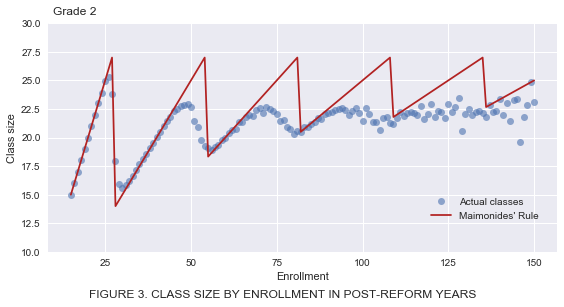

In [8]:
create_fig3(df)